# TASK 1 : Analyze a Real Dataset

- Goal: Perform basic data analysis and visualization.
Example Tools: Python, Pandas, Matplotlib.

- Steps:
1. Load a dataset (e.g., Titanic dataset) using Pandas.
2. Analyze basic statistics (mean, median, etc.).
3. Visualize data (e.g., survival rates by gender) using Matplotlib.

# Analyzing The `Iris` Dataset

***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

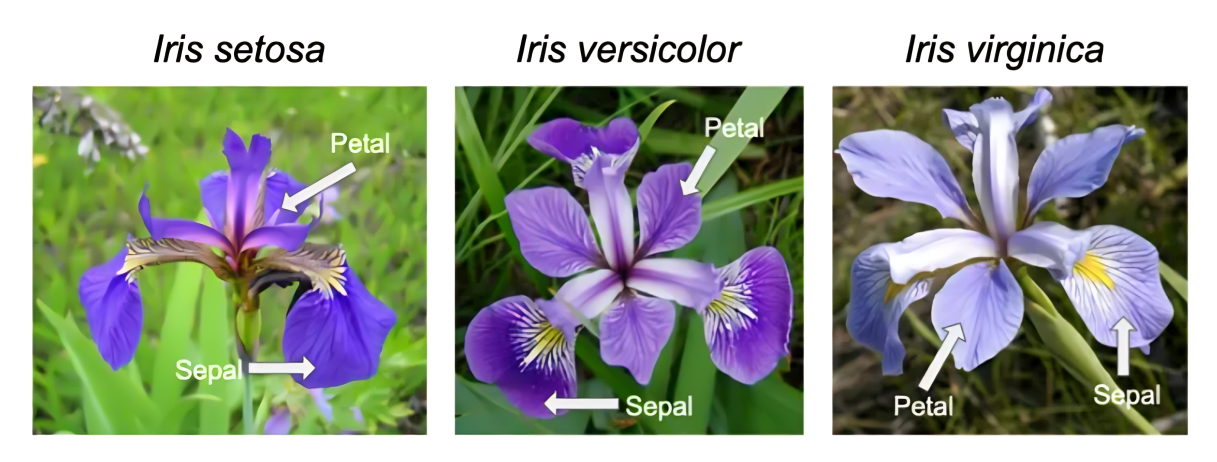

In [2]:
from IPython.display import Image
Image(filename='Iris Flowers Picture.png')

# About the Dataset
Description of the data:
- **Id**: Unique number for each row
- **SepalLengthCm**: Length of the sepal (in cm)
- **SepalWidthCm**: Width of the sepal (in cm)
- **PetalLengthCm**: Length of the petal (in cm)
- **PetalWidthCm**: Width of the petal (in cm)
- **Species**: Name of the species

In [3]:
df_iris = pd.read_csv('Iris.csv')

print(30 * '-', 'Dataset', 30 * '-')
print(df_iris.head(5))
print('\n')


print(30 * '-', 'Info', 30 * '-')
print(df_iris.info())
print('\n')

print(30 * '-', 'Describe', 30 * '-')
print(df_iris.describe())
print('\n')

print(30 * '-', 'Null Values', 30 * '-')
print(df_iris.isna().sum())
print('Total Null Values: ', df_iris.isna().sum().sum())
print('\n')

print(30 * '-', 'Unique Values', 30 * '-')
for col in df_iris.columns:
    print(f"Column [{col}]: {df_iris[col].unique()}")
    print(f"Count of Unique Values: {df_iris[col].nunique()}\n\n")


------------------------------ Dataset ------------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


------------------------------ Info ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-nul

# Exploratory Data Analysis (EDA)

--> We will drop the Column `Id` as it not needed in our EDA

In [4]:
df_iris.drop(columns='Id', axis=1, inplace=True)

In [5]:
df_iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Statistical Analysis

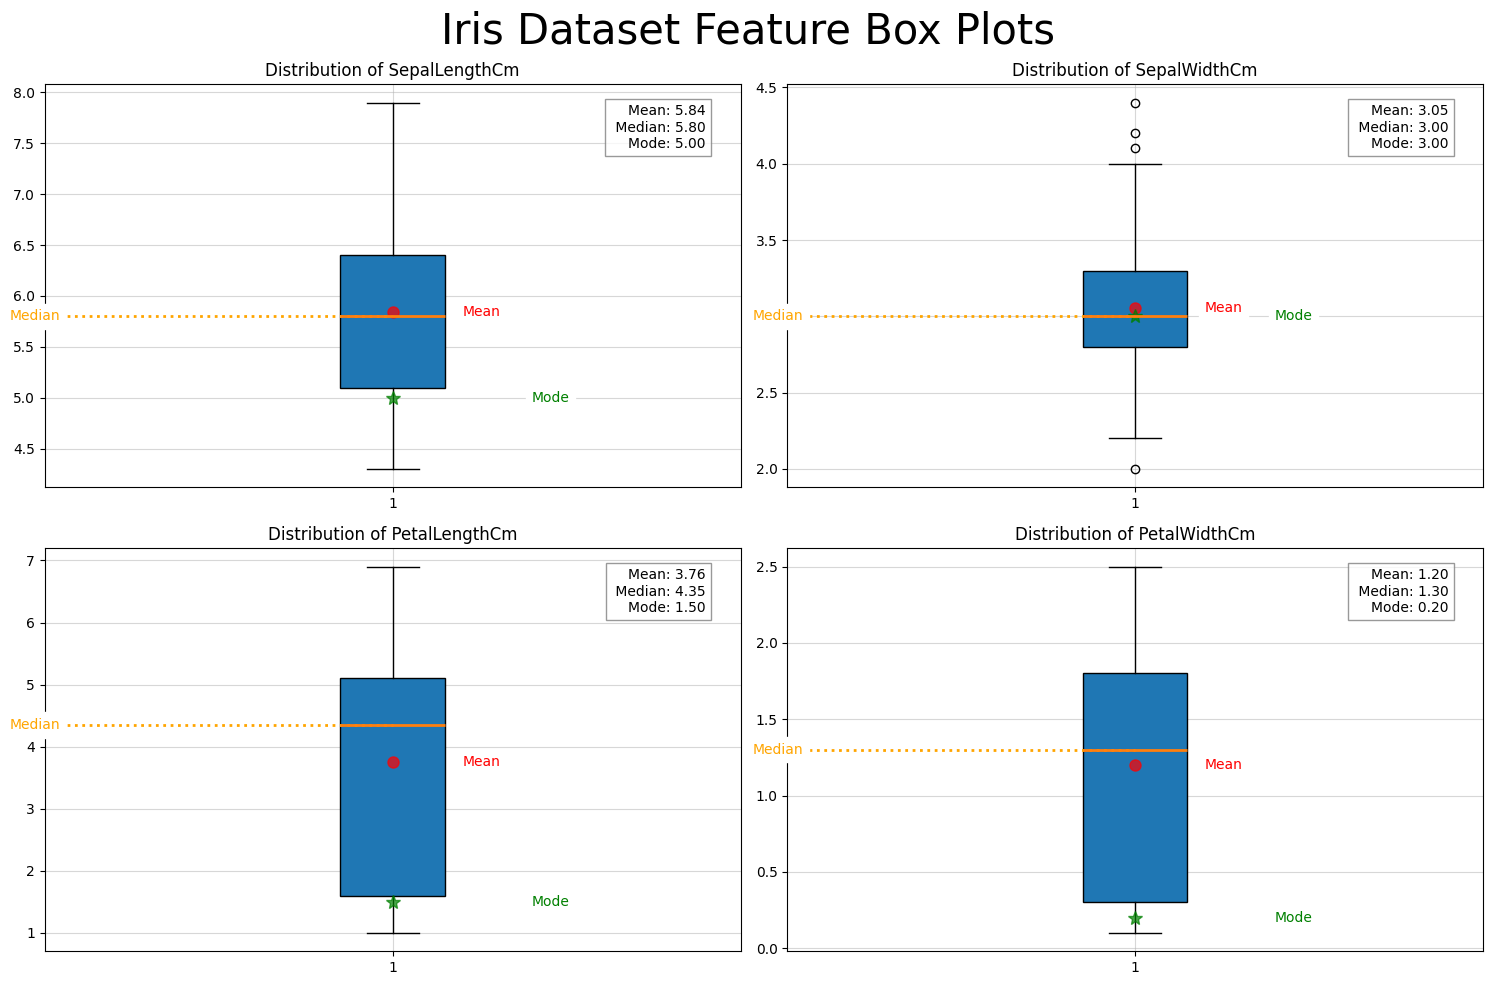

In [6]:
def box_plt(df, ax, col):
    ax.boxplot(x=df[col], medianprops={'linewidth': 2}, showmeans=False, patch_artist=True)
    ax.set_title(f"Distribution of {col}")
    ax.grid(alpha=0.5)

    median = df[col].median()
    mean = df[col].mean()
    mode_val = df[col].mode()[0]
    
    # Statistical Value Box
    ax.text(0.95, 0.95, f"Mean: {mean:.2f}\n Median: {median:.2f}\nMode: {mode_val:.2f}", transform=ax.transAxes, ha='right', va='top',bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    ax.axhline(median, color='orange', linestyle=':', linewidth=2, alpha=1, xmax=0.5) #Median marker
    ax.text(0.45, median, 'Median', ha='left', va='center', color='orange', backgroundcolor='white')
    
    ax.plot(1, mean, 'ro', markersize=8, alpha=0.7) #Mean marker
    ax.text(1.1, mean, 'Mean', ha='left', va='center', color='red', backgroundcolor='white')

    ax.plot(1.0, mode_val, 'g*', markersize=10, alpha=0.7)  #Mode marker
    ax.text(1.2, mode_val, 'Mode', ha='left', va='center', color='green', backgroundcolor='white')

fig = plt.figure(figsize=(15,10))
fig.suptitle("Iris Dataset Feature Box Plots", size=30)

for i in range(1, len(df_iris.columns)):
    ax = fig.add_subplot(2, 2, i)
    box_plt(df_iris, ax, df_iris.columns[i - 1])

plt.tight_layout()
plt.show()

*Observations:*
1. SepalLengthCm: Near-symmetric distribution (Mean ≈ Median), but the Mode (5.0) is slightly lower, indicating mild right-skew with clustering at smaller values.

2. SepalWidthCm: Perfect alignment of Mean, Median, and Mode (3.0) suggests symmetry, but outliers are present (visible in boxplot).

3. PetalLengthCm: Significant right-skew (Mean=3.76 < Median=4.35), with Mode (1.5) far left, implying most data clusters at lower values with a long right tail.

4. PetalWidthCm: No outliers detected; distribution appears unimodal but skewed (Mode=0.2 differs from Median=1.3).

**Note:**

1. if(Mean = Median = Mode), then Symmetric Data

2. if(Mean > Median > Mode), then Postively(Right) Skewed

3. if(Mean < Median < Mode), then Negatively(Left) Skewed

### **Skewness of Data**

In [7]:
def get_skewness(df):
    print("Skewness in Dataset")
    for col in df.select_dtypes(include=['number']):

        #direction
        if df[col].skew() > 0:
            direction = "Skewed Right"
        elif df[col].skew() < 0:
            direction = "Skewed Left"
        else:
            direction = "Symmtrical Data"

        #magnitude
        if abs(df[col].skew()) > 1:
            magnitude='Highly'
        else:
            magnitude='Slightly'
        print(f"{col}: {df[col].skew():+.4f}, {magnitude} {direction}")

get_skewness(df_iris)

Skewness in Dataset
SepalLengthCm: +0.3149, Slightly Skewed Right
SepalWidthCm: +0.3341, Slightly Skewed Right
PetalLengthCm: -0.2745, Slightly Skewed Left
PetalWidthCm: -0.1050, Slightly Skewed Left


## Distribution of Species

In [8]:
df_iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

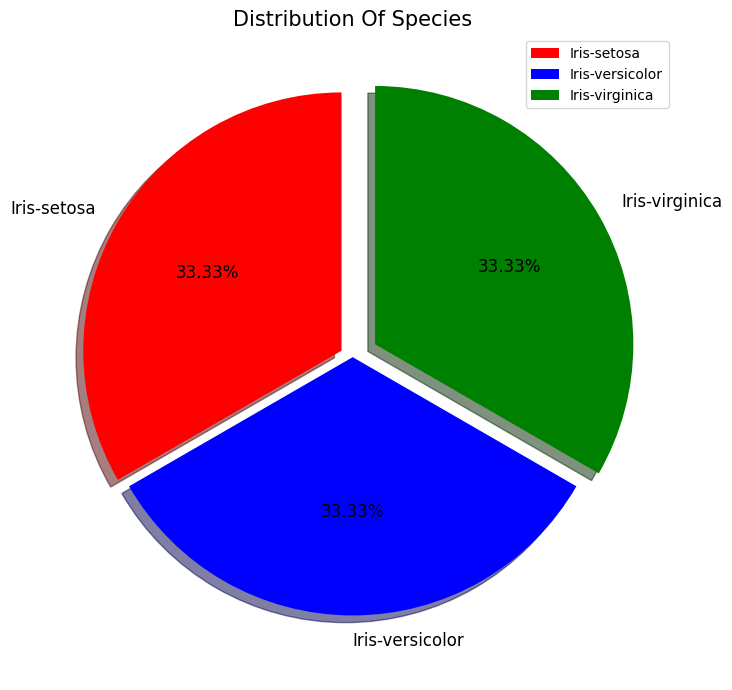

In [9]:
Species = df_iris['Species'].unique()

plt.figure(figsize=(10, 7))
plt.pie(x=df_iris['Species'].value_counts(), labels=Species, autopct='%.2f%%', explode=(0.05, 0, 0.1), textprops={'fontsize':12}, startangle=90, colors=['red','blue','green'], shadow=True)
plt.title("Distribution Of Species", fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

*Observation*:  All classes are equally balanced

# Species-Wise Analysis

In [10]:
(df_iris.Species.unique())
    

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Rug Plots

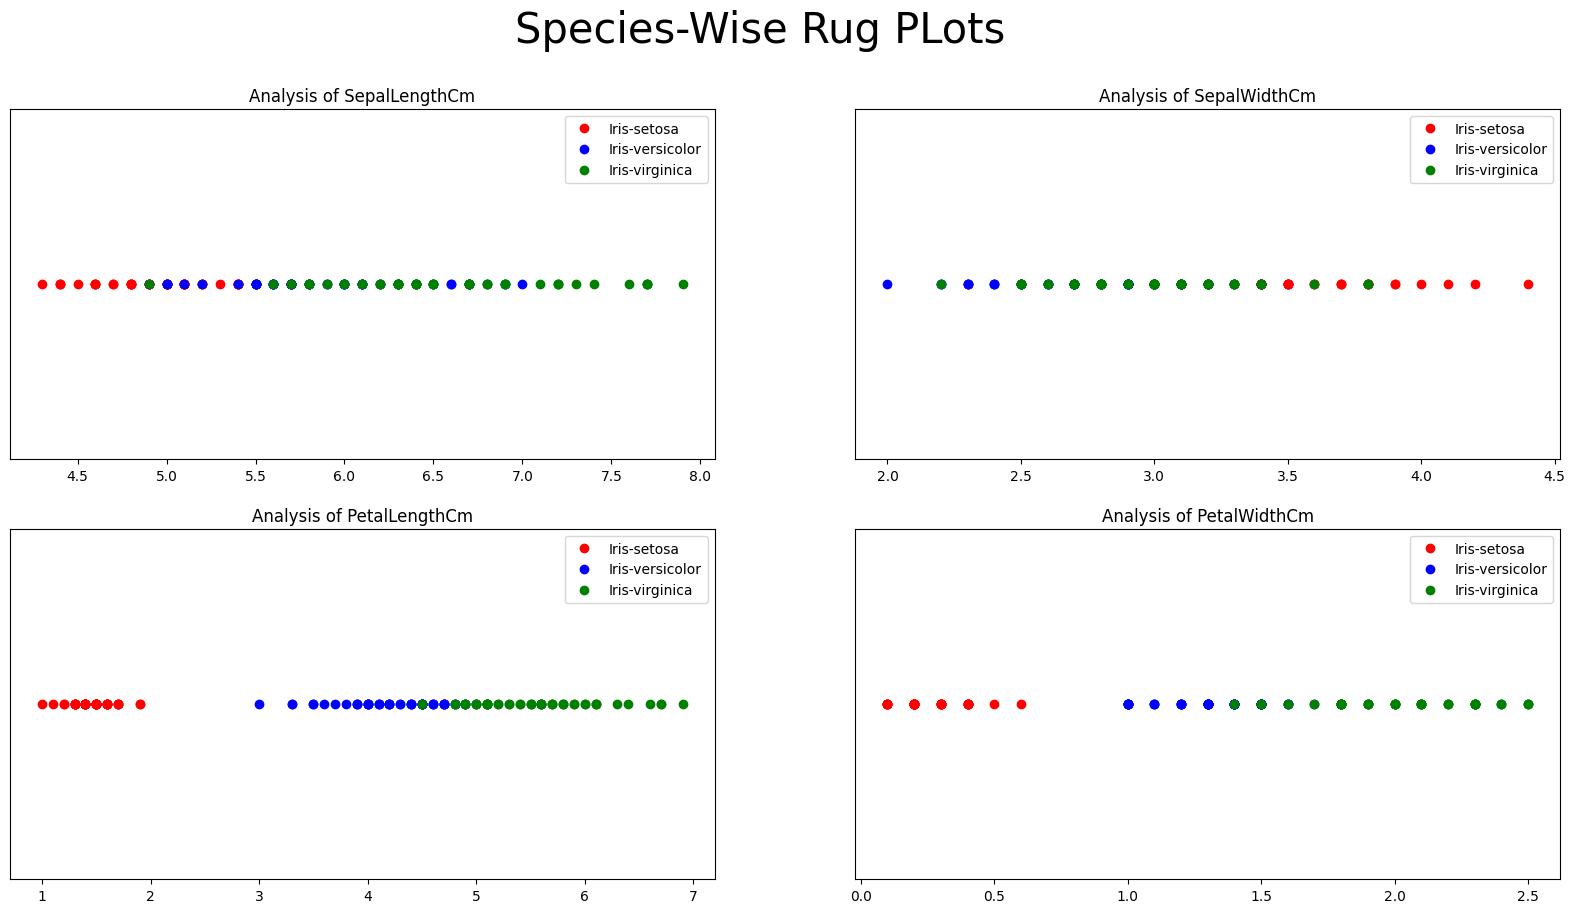

In [11]:
fig = plt.figure(figsize=(20,10))
Types = df_iris['Species'].unique()

def rug_plot(df, ax, col):
    marker=['ro','bo','go']
    index = 0
    for Type in Types:
        ax.plot((df[df['Species'] == Type])[col], np.zeros_like((df[df['Species'] == Type])[col]), marker[index] , label=Type)
        index = index + 1

    ax.set_title(f"Analysis of {col}")
    ax.get_yaxis().set_visible(False)
    ax.legend()    
    
fig.suptitle("Species-Wise Rug PLots", size=30)
for i in range(1, len(df_iris.columns)):
    ax = fig.add_subplot(2,2,i)
    rug_plot(df_iris, ax, df_iris.columns[i-1])


plt.show()    

*Observations*:

- `SepalLengthCm`: Iris‑setosa has the shortest sepals (≈ 4.3 – 4.8 cm) with one red outlier nudging 5.4 cm. Iris‑versicolor occupies the middle band (5.0 – 5.5 cm). Iris‑virginica shows the longest sepals, often ≥ 6 cm and approaching 8 cm.

- `SepalWidthCm`: Iris‑versicolor exhibits the narrowest sepals (≈ 2.0 – 2.4 cm). Widths ≥ 4 cm are seen only in Iris‑setosa. In the 2.3 – 3.8 cm range lies Iris-virginica.

- `PetalLengthCm`: Iris‑setosa petals never exceed 2 cm. Iris‑versicolor petals cluster around 3 – 5 cm. Iris‑virginica has the longest petals, generally ≥ 4.5 cm and stretching to ~7 cm.

- `PetalWidthCm`: Iris‑setosa petals are the thinnest (≈ 0.1 – 0.6 cm). Iris‑versicolor sits mid‑range (≈ 1.0 – 1.3 cm). Iris‑virginica boasts the widest petals, typically > 1.5 cm and up to ~2.5 cm.

## Voilin Plots

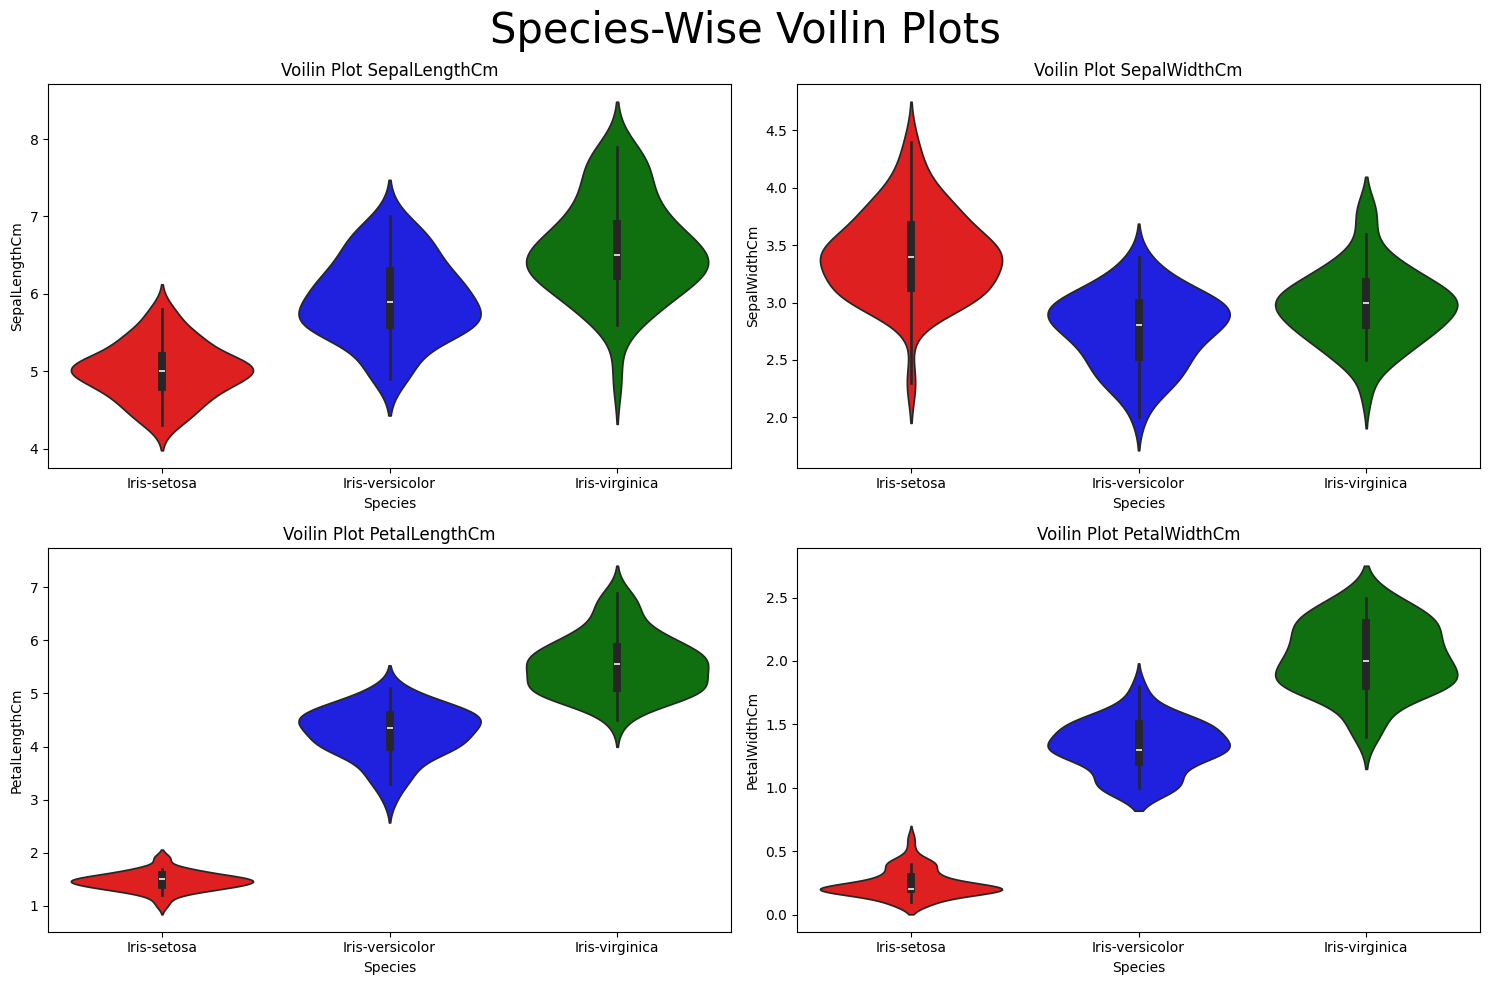

In [12]:
fig = plt.figure(figsize=(15,10))
Species = df_iris['Species'].unique()

def voilin_plot(df, ax, col):
    marker=['red', 'blue', 'green']
    sns.violinplot(data=df, x='Species', y=col, hue='Species', palette=marker, ax=ax)

    plt.title(f"Voilin Plot {col}")
    
fig.suptitle("Species-Wise Voilin Plots", size=30)
for i in range(1, len(df_iris.columns)):
    ax = fig.add_subplot(2, 2, i)
    voilin_plot(df_iris, ax, df_iris.columns[i-1])

plt.tight_layout()
plt.show()



## Pair PLot

<Figure size 1200x1000 with 0 Axes>

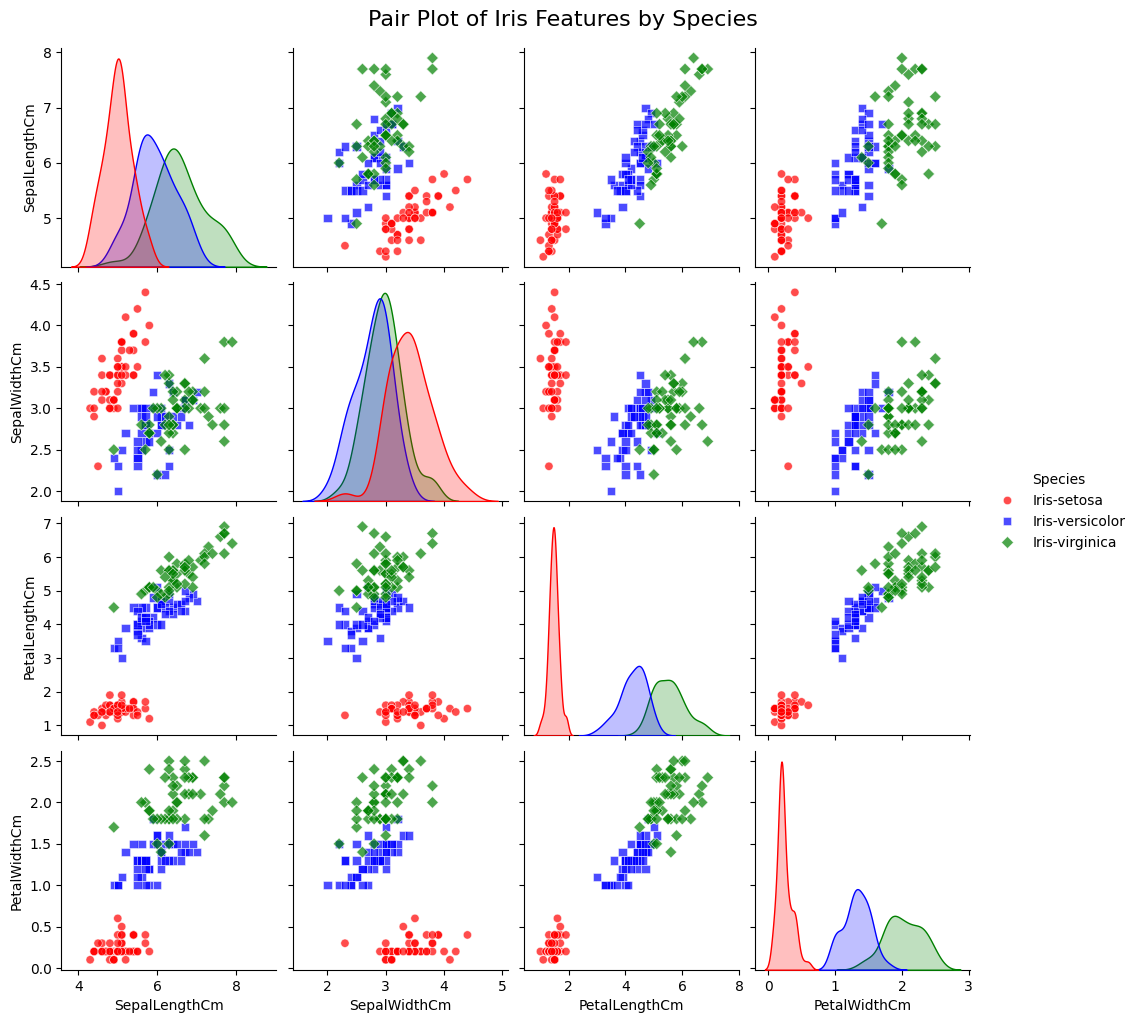

In [13]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_iris, hue='Species', palette=['red', 'blue', 'green'], markers=['o', 's', 'D'], plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02, fontsize=16)
plt.show()

`Analytical Interpretation of Pairplot`
- The pairplot provides a comprehensive view of pairwise relationships between the numerical features in the Iris dataset, segmented by species.

`Class Separability`
- Iris-setosa is linearly separable from the other two species in nearly all feature spaces, particularly when petal measurements are involved.
- Iris-versicolor and Iris-virginica exhibit partial overlap, especially in sepal dimensions, but show distinguishable clusters in petal-related feature spaces.

`Univariate Distributions (Diagonal)`
- The petal length and petal width features demonstrate distinct, unimodal distributions for each species, indicating high discriminative power.
- Sepal width shows considerable distributional overlap across classes, suggesting limited effectiveness for class separation in isolation.

`Bivariate Relationships (Off-diagonal)`
- PetalLength vs PetalWidth exhibits a strong positive correlation with minimal class overlap — a highly informative feature pair for classification models.
- PetalLength vs SepalLength also indicates a positive correlation with reasonable inter-species separation.
- SepalLength vs SepalWidth shows weaker class discrimination and should be deprioritized in feature selection for modeling tasks.

## Describe Features By Species

In [14]:
for s in Species:
    df_temp = df_iris[df_iris['Species'] == s]
    print("\n" + (30*"-") + s.upper() + ("-"*30))
    print(df_temp.describe())


------------------------------IRIS-SETOSA------------------------------
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000

------------------------------IRIS-VERSICOLOR------------------------------
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.9000

# Correlation Matrix

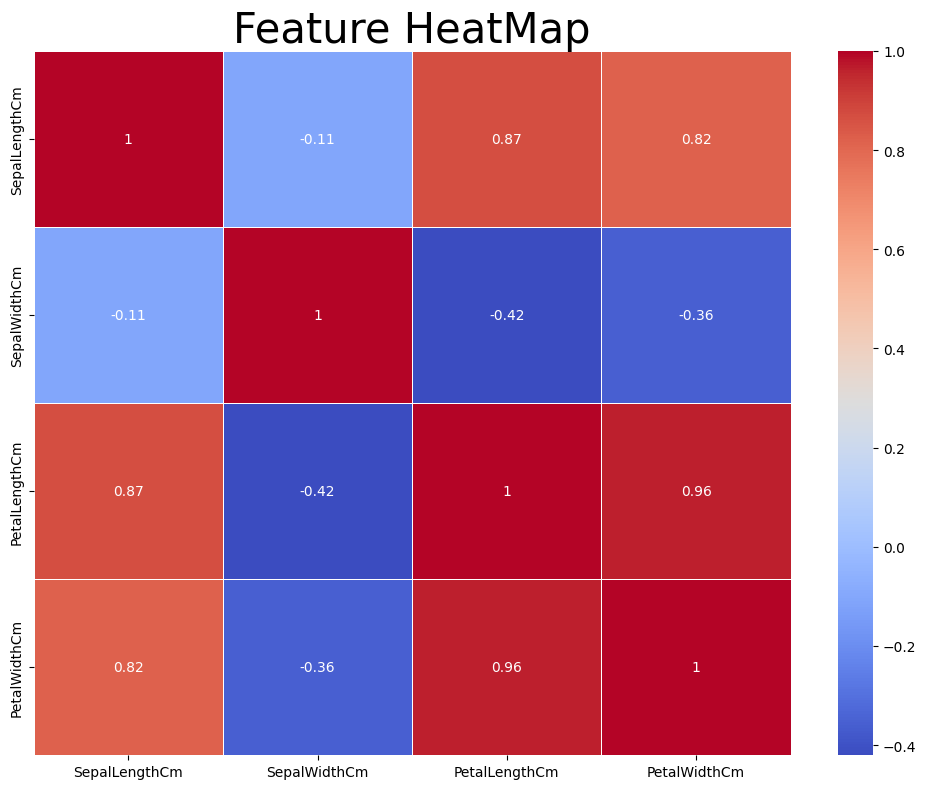

In [15]:
df_numeric = df_iris.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))

heatmap=sns.heatmap(data=df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Feature HeatMap", size=30)
plt.tight_layout()
plt.show()


# Advanced Statistical Analysis

## Normality Tests

### Shapiro-Wilk Test For Normality Check

In [16]:
from scipy import stats
features = df_iris.columns[0:4]

print("NORMALITY TESTS (Shapiro-Wilk):")
print("-" * 40)
for feature in features:
    stat, p_value = stats.shapiro(df_iris[feature])
    print(f"{feature}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print(f"  → {feature} appears to be normally distributed") # Null Hypothesis
    else:
        print(f"  → {feature} does not appear to be normally distributed") # Alternate Hypothesis

NORMALITY TESTS (Shapiro-Wilk):
----------------------------------------
SepalLengthCm: Statistic=0.9761, p-value=0.0102
  → SepalLengthCm does not appear to be normally distributed
SepalWidthCm: Statistic=0.9838, p-value=0.0752
  → SepalWidthCm appears to be normally distributed
PetalLengthCm: Statistic=0.8764, p-value=0.0000
  → PetalLengthCm does not appear to be normally distributed
PetalWidthCm: Statistic=0.9026, p-value=0.0000
  → PetalWidthCm does not appear to be normally distributed


### Histograms For Normality Check

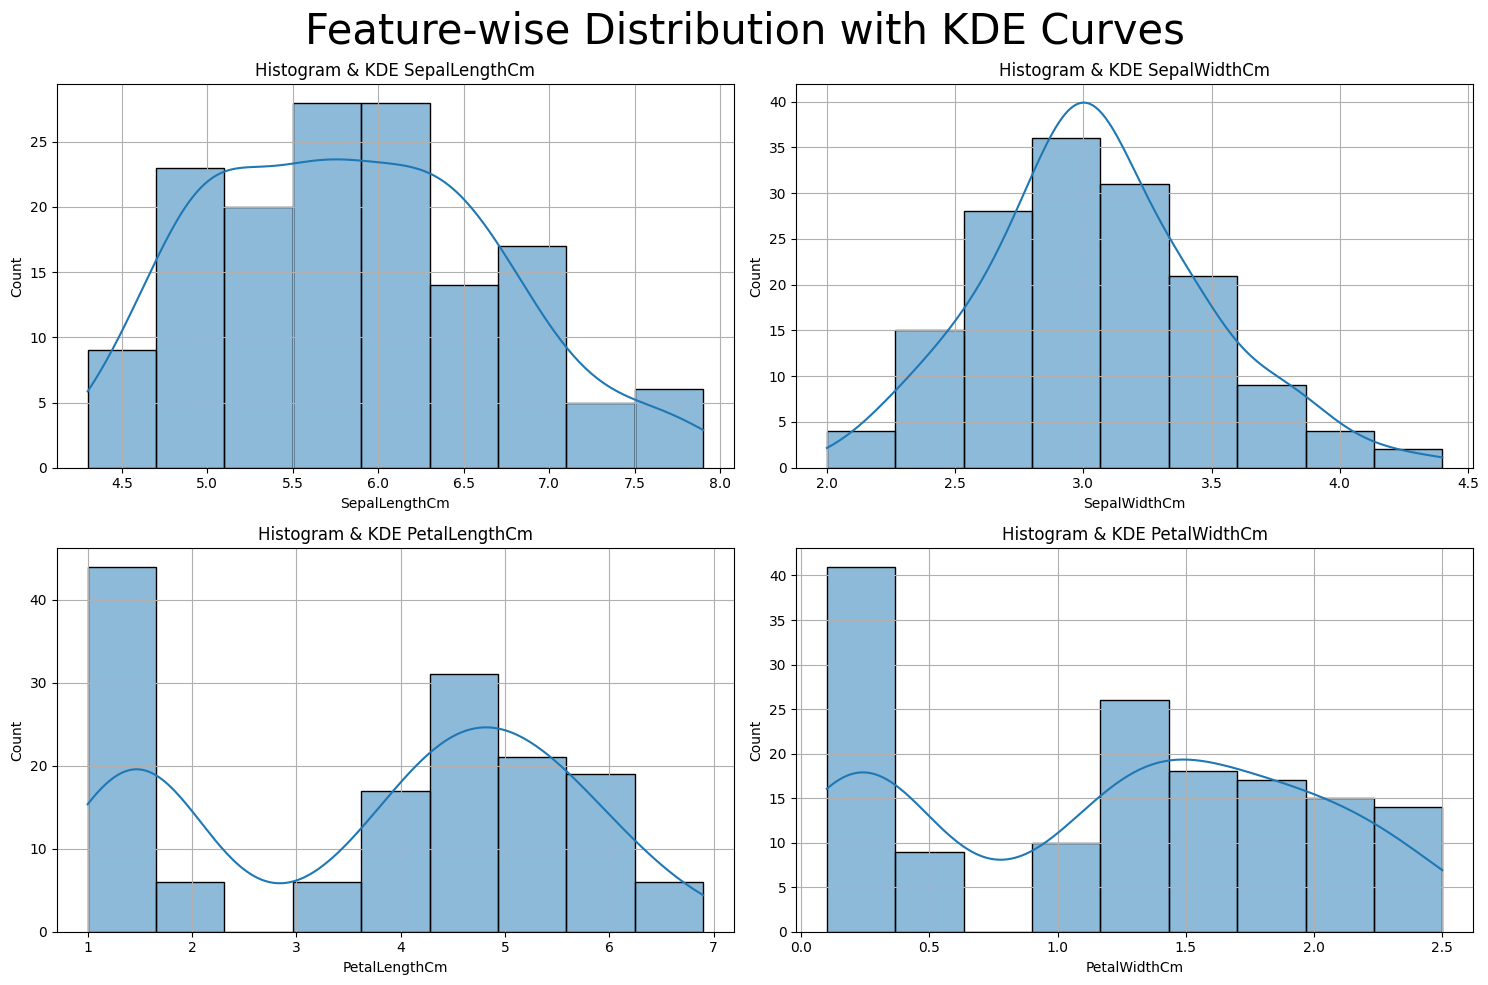

In [17]:
fig = plt.figure(figsize=(15, 10))

def draw_hist(df, col, ax):
    n = len(df[col])
    sns.histplot(x=df[col], ax=ax, kde=True, bins=int(np.ceil(np.log2(n) + 1)))
    plt.title(f"Histogram & KDE {col}")
    plt.grid()
    


for i in range(1, len(df_iris.columns)):
    ax = fig.add_subplot(2, 2, i)
    draw_hist(df_iris, features[i-1], ax)

plt.suptitle("Feature-wise Distribution with KDE Curves", size=30)
plt.tight_layout()
plt.show()

    

## Outlier Detection

*Note:*
- IQR when not normal data
- Z_scores method when data is normally distributed

In [18]:
def outlier_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

from scipy.stats import zscore
def outlier_Zscore(df, col):
    Zscores = stats.zscore(df[col])
    outliers = df[abs(Zscores) > 3]
    return outliers


print(f"{'='*10} IQR Method {'='*10}")
for col in features:
    outliers = outlier_IQR(df_iris, col)
    print(f"\n--> Column: {col} | Outliers Found: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]])

print(f"\n\n\n{'='*10} Z-Score Method {'='*10}")
for col in features:
    outliers = outlier_Zscore(df_iris, col)
    print(f"\n--> Column: {col} | Outliers Found: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]])    


========== IQR Method ==========

--> Column: SepalLengthCm | Outliers Found: 0

--> Column: SepalWidthCm | Outliers Found: 4
    SepalWidthCm
15           4.4
32           4.1
33           4.2
60           2.0

--> Column: PetalLengthCm | Outliers Found: 0

--> Column: PetalWidthCm | Outliers Found: 0



========== Z-Score Method ==========

--> Column: SepalLengthCm | Outliers Found: 0

--> Column: SepalWidthCm | Outliers Found: 1
    SepalWidthCm
15           4.4

--> Column: PetalLengthCm | Outliers Found: 0

--> Column: PetalWidthCm | Outliers Found: 0


- Since `SepalWidthCm` follows a `normal distribution`, we go with the `Z-score` method for outlier detection.

## ANOVA TESTS (Between Species)

In [19]:
for feature in features:
    setosa = df_iris[df_iris['Species'] == 'Iris-setosa'][feature]
    versicolor = df_iris[df_iris['Species'] == 'Iris-versicolor'][feature]
    virginica = df_iris[df_iris['Species'] == 'Iris-virginica'][feature]
    
    f_stat, p_value = stats.f_oneway(setosa, versicolor, virginica)
    print(f"{feature}: F-statistic={f_stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"  → Significant difference between species for {feature}") # Alternate Hypothesis
    else:
        print(f"  → No significant difference between species for {feature}") # Null Hypothesis
    print("-" * 40)

SepalLengthCm: F-statistic=119.2645, p-value=0.0000
  → Significant difference between species for SepalLengthCm
----------------------------------------
SepalWidthCm: F-statistic=47.3645, p-value=0.0000
  → Significant difference between species for SepalWidthCm
----------------------------------------
PetalLengthCm: F-statistic=1179.0343, p-value=0.0000
  → Significant difference between species for PetalLengthCm
----------------------------------------
PetalWidthCm: F-statistic=959.3244, p-value=0.0000
  → Significant difference between species for PetalWidthCm
----------------------------------------


---

# 📊 FINAL EDA SUMMARY & KEY INSIGHTS

---

## 1. Dataset Overview
- **Total Samples:** 150  
- **Number of Features:** 4  
- **Unique Species:** 3 (`Setosa`, `Versicolor`, `Virginica`)  
- **Balanced Dataset:**  Yes, all classes are equally represented  

---

## 2. Key Correlations
The following feature pairs show strong correlation (|correlation| > 0.8):

- **PetalLength ↔ PetalWidth:** 0.962  
- **SepalLength ↔ PetalLength:** 0.871  
- **SepalLength ↔ PetalWidth:** 0.818  

This indicates that petal-based features are strongly linearly related and may contribute redundantly.

---

## 3. Species Separability
- **Setosa** is the **most distinct** species — very easily separable from others.
- **Versicolor** and **Virginica** show **some overlap** but are still reasonably distinguishable.
- **Best Discriminating Features:**  
  - `PetalLengthCm`  
  - `PetalWidthCm`  

---

## 4. Data Quality
- **No Missing Values**  
- **Minimal Outliers** (1 in SepalWidth)  
- **Good feature spread across all variables**  

---

## 5. Recommendations for Modeling
- Use **all features** for classification tasks    
- Petal features may be **most important for classification**

---

### EDA COMPLETE — Ready for Machine Learning!

---


# Task 2 : **Build a Simple Predictive Model**

`Goal:` Train a **Logistic Regression** model to predict binary outcomes.
Example Tools: Python, scikit-learn.

`Steps:`
- Preprocess the dataset (handle missing values, encode categories).
- Split data into training and testing sets.
- Train and evaluate the model using scikit-learn

---
--> In order to complete the objective we will be creating a new column 'Target' that indicates the presence of our target species, in this case which is the `Iris-setosa`.

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = df_iris.copy()

# Encode target: 1 if Setosa, 0 otherwise
df['Target'] = df['Species'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

# using all features for prediction
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Target']

## Class Distribution

C:\Users\sdnr1\AppData\Local\Temp\ipykernel_23732\178452276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values, palette=['red','green'])


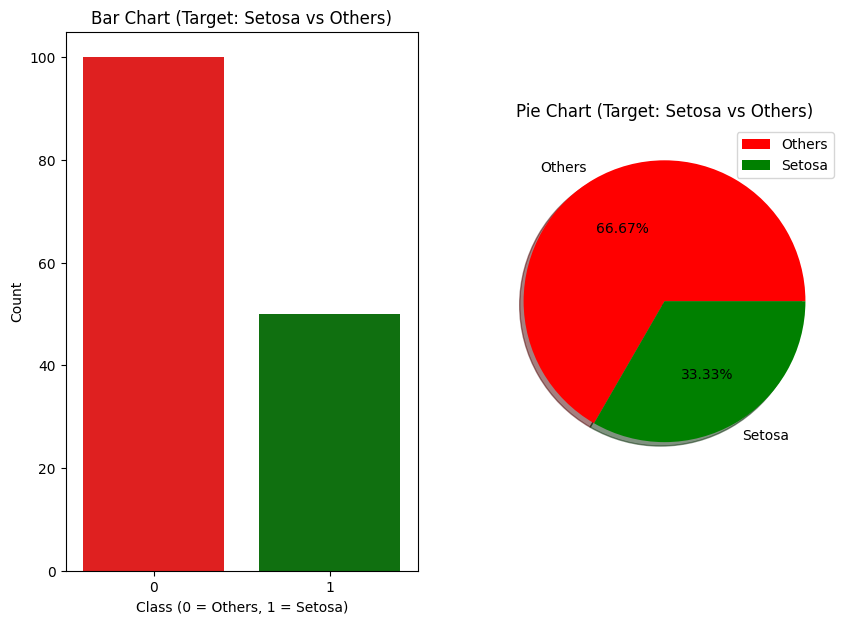

In [21]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1,2,1)
sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values, palette=['red','green'])
plt.title("Bar Chart (Target: Setosa vs Others)")
plt.xlabel("Class (0 = Others, 1 = Setosa)")
plt.ylabel("Count")


fig.add_subplot(1,2,2)
plt.pie(x=df['Target'].value_counts().values, labels=['Others', 'Setosa'], colors=['red', 'green'], autopct= '%.2f%%', shadow=True)
plt.title("Pie Chart (Target: Setosa vs Others)")


plt.legend()
plt.show()

In [22]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# evaluation
y_pred = model.predict(X_test_scaled)
print("Train Accuracy:", model.score(X_train_scaled, y_train))
print("Test Accuracy :", model.score(X_test_scaled, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion Matirx

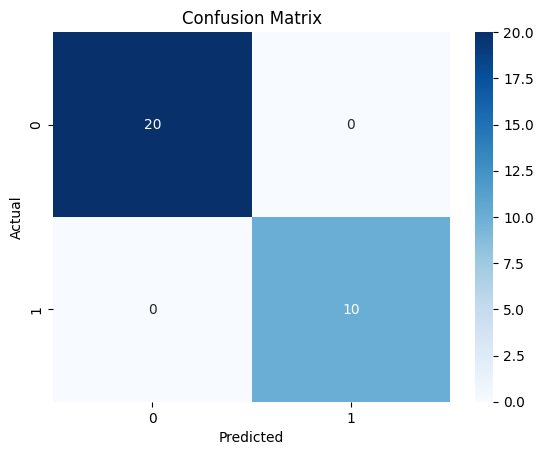

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation (5-fold)

In [24]:
X_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(model, X_scaled, y, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


-----------------------------------------------------------------

`Observations:`
- the model seems to be performing perfectly.
- However, this does not necessarily mean the model is memorizing the data (i.e., overfitting).
- This high performance was expected, as our EDA showed that the Iris-setosa species is clearly distinguishable from the other two.
- Therefore, the model achieves a perfect score largely due to the natural separability of the classes in the dataset, not due to overfitting.

In [25]:
import json

with open("Iris_EDA_Classification.ipynb", "r", encoding="utf-8") as f:
    notebook = json.load(f)

code_cells = [cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'code']

with open("extracted_code.py", "w", encoding="utf-8") as f:
    for i, code in enumerate(code_cells):
        f.write(f"# Cell {i+1}\n{''.join(code)}\n\n")


In [27]:
import json

# Load notebook
with open("Iris_EDA_Classification.ipynb", "r", encoding="utf-8") as f:
    notebook = json.load(f)

# Open output file
with open("notebook_combined_export.py", "w", encoding="utf-8") as f:
    for i, cell in enumerate(notebook['cells']):
        cell_type = cell['cell_type']
        content = ''.join(cell['source'])

        if cell_type == 'code':
            f.write(f"# --- Cell {i+1}: Code ---\n")
            f.write(content + "\n\n")
        elif cell_type == 'markdown':
            f.write(f"# --- Cell {i+1}: Markdown ---\n")
            # Convert markdown to Python comments
            markdown_lines = content.splitlines()
            commented = '\n'.join(f"# {line}" for line in markdown_lines)
            f.write(commented + "\n\n")
